In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#File to Load
us_Pollution = "Datasets/AQI_data.csv"
us_GDP_Industry = "Datasets/GDP_and_Personal_Income.csv"
#us_GDP_State = "Datasets/GDP_by_State.csv"

#Read the dataframes
us_pollution_df = pd.read_csv(us_Pollution)
us_GDP_Industry_df = pd.read_csv(us_GDP_Industry)

In [3]:
#Display us_Pollution DataFrame
us_pollution_df.head()

,Unnamed: 0,State Code,County Code,State,County,City,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,1,4,13,Arizona,Maricopa,Phoenix,2000,46,34,13,25
1,5,4,13,Arizona,Maricopa,Phoenix,2000,34,27,4,26
2,9,4,13,Arizona,Maricopa,Phoenix,2000,48,14,16,28
3,13,4,13,Arizona,Maricopa,Phoenix,2000,72,28,23,34
4,17,4,13,Arizona,Maricopa,Phoenix,2000,58,10,21,42


In [4]:
#Find the Average pollution by pollutants for the US
us_pollution_df_Overall = us_pollution_df.groupby(["Year"]).mean()
#us_pollution_df_Overall

#Drop Columns not needed for analysis
us_pollution_df_Overall = us_pollution_df_Overall.loc[:,['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
us_pollution_df_Overall

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Year,,,,
2000,30.969852,36.022688,14.260908,9.540096
2001,31.310673,37.641191,12.836909,8.792393
2002,29.363726,39.559160,11.030905,8.486407
2003,28.334598,36.631114,11.328351,8.246634
2004,26.940324,34.741209,11.249550,7.411070
2005,27.418406,37.017918,11.186406,6.891646
2006,26.995400,36.201102,10.007218,6.965776
2007,24.969219,36.424798,9.058893,6.029741
2008,23.491621,35.421012,7.310131,5.320300


In [5]:
#Display the us_Pollution DataFrame
us_GDP_Industry_df.head(3)

,Year,Total Industry,"Agriculture, forestry, fishing, and hunting","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services",Other services (except government and government enterprises),Federal civilian,Military,State and local
0,2000,10.25,0.1,0.11,0.18,0.46,1.55,0.62,0.69,0.31,0.47,1.97,1.11,0.70,0.39,0.28,0.25,0.18,0.90
1,2001,10.58,0.1,0.12,0.18,0.49,1.47,0.61,0.71,0.31,0.50,2.13,1.16,0.75,0.39,0.27,0.25,0.18,0.96
2,2002,10.94,0.1,0.11,0.18,0.49,1.47,0.61,0.73,0.31,0.55,2.22,1.19,0.81,0.41,0.28,0.27,0.19,1.01


In [6]:
#Merge Both DataFrames
merge_table = pd.merge(us_pollution_df_Overall, us_GDP_Industry_df, on="Year", how="outer")
merge_table

,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Total Industry,"Agriculture, forestry, fishing, and hunting","Mining, quarrying, and oil and gas extraction",Utilities,Construction,...,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services",Other services (except government and government enterprises),Federal civilian,Military,State and local
0,2000,30.969852,36.022688,14.260908,9.540096,10.25,0.10,0.11,0.18,0.46,...,0.31,0.47,1.97,1.11,0.70,0.39,0.28,0.25,0.18,0.90
1,2001,31.310673,37.641191,12.836909,8.792393,10.58,0.10,0.12,0.18,0.49,...,0.31,0.50,2.13,1.16,0.75,0.39,0.27,0.25,0.18,0.96
2,2002,29.363726,39.559160,11.030905,8.486407,10.94,0.10,0.11,0.18,0.49,...,0.31,0.55,2.22,1.19,0.81,0.41,0.28,0.27,0.19,1.01
3,2003,28.334598,36.631114,11.328351,8.246634,11.46,0.11,0.14,0.18,0.53,...,0.32,0.56,2.30,1.25,0.86,0.43,0.28,0.28,0.21,1.05
4,2004,26.940324,34.741209,11.249550,7.411070,12.21,0.14,0.17,0.20,0.58,...,0.35,0.62,2.39,1.34,0.93,0.46,0.30,0.30,0.23,1.11
5,2005,27.418406,37.017918,11.186406,6.891646,13.04,0.13,0.23,0.20,0.65,...,0.38,0.64,2.61,1.45,0.97,0.48,0.31,0.31,0.24,1.16
6,2006,26.995400,36.201102,10.007218,6.965776,13.81,0.13,0.27,0.23,0.70,...,0.41,0.65,2.74,1.55,1.04,0.51,0.33,0.32,0.25,1.22
7,2007,24.969219,36.424798,9.058893,6.029741,14.45,0.14,0.31,0.23,0.72,...,0.41,0.71,2.85,1.67,1.09,0.53,0.33,0.33,0.27,1.29
8,2008,23.491621,35.421012,7.310131,5.320300,14.71,0.15,0.39,0.24,0.65,...,0.43,0.74,2.76,1.78,1.18,0.54,0.33,0.35,0.29,1.35
9,2009,21.730511,32.955481,5.444802,5.169600,14.45,0.13,0.28,0.26,0.57,...,0.40,0.72,2.87,1.69,1.27,0.53,0.33,0.36,0.30,1.38


KeyError: 'Information'

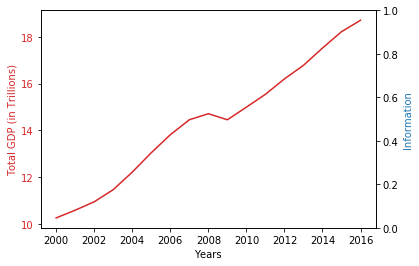

In [12]:
#Generate Visuals: N02 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Information', color=color)
ax2.plot(x_axis, merge_table['Information'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.show()

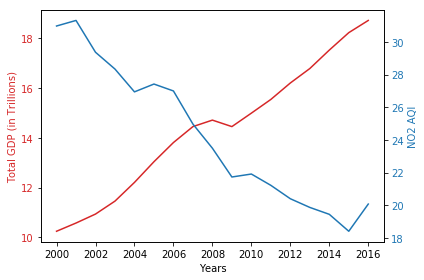

In [14]:
#Generate Visuals: N02 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('NO2 AQI', color=color)
ax2.plot(x_axis, merge_table['NO2 AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.show()

#Save the Figure
fig.savefig("Images/GDPvsNO2AQI.png")

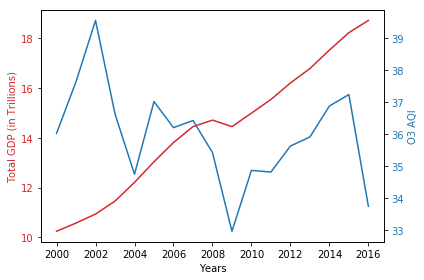

In [15]:
#Generate Visuals: O3 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('O3 AQI', color=color)
ax2.plot(x_axis, merge_table['O3 AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.show()

#Save the Figure
fig.savefig("Images/GDPvs03AQI.png")

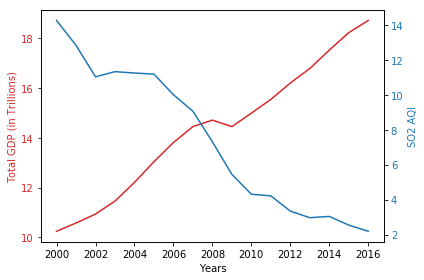

In [16]:
#Generate Visuals: O3 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('SO2 AQI', color=color)
ax2.plot(x_axis, merge_table['SO2 AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.show()

#Save the Figure
fig.savefig("Images/GDPvsS02AQI.png")

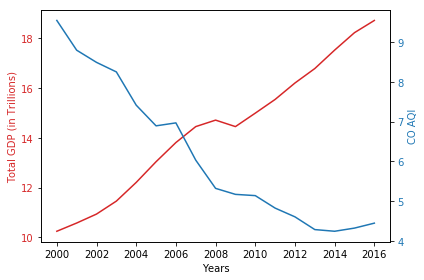

In [17]:
#Generate Visuals: O3 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('CO AQI', color=color)
ax2.plot(x_axis, merge_table['CO AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()  
plt.show()

#Save the Figure
fig.savefig("Images/GDPvsC0AQI.png")